# Google Colab matplotlib 한글 폰트 사용

## Step 1: Colab에 한글 폰트 설치 하기

In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 26 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

## Step 2: Colab 런타임 재시작(Ctrl+M .)

가상머신 재부팅 과정

## Step 3: matplotlib의 폰트를 Nanum 폰트로 지정

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## 한글 폰트 테스트

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.DataFrame(data={'구': ['강남구', '서초구'],
                        '가격': [100, 150]})
df

,구,가격
0,강남구,100
1,서초구,150


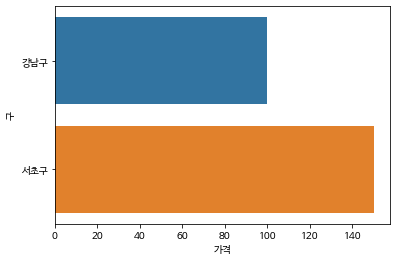

In [4]:
sns.barplot(x='가격', y='구', data=df)
plt.show()

# 아파트 매매가격 분석


*   [apt_201910.csv](https://github.com/JakeOh/202208_itw_java134_lab_python/raw/main/apt_201910.csv) 파일을 읽고 DataFrame 생성
    *   encoding 파라미터 설정
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    *   '강원도 강릉시 견소동' -> '강원도'
*   '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    *   201910 -> 2019, 10
*    서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력


# 데이터프레임 생성

In [ ]:
file_path = 'https://github.com/JakeOh/202208_itw_java134_lab_python/raw/main/apt_201910.csv'
df = pd.read_csv(file_path, encoding='cp949', thousands=',')
#> thousands=',': 숫자의 1000자리 구분자로 ','가 사용됨

파일 인코딩 타입

* utf-8: Linux, MacOS 등 대부분의 OS에서 텍스트의 기본 인코딩
* cp949: 한글 MS-Windows에서 텍스트의 기본 인코딩
* cp1252: 영문 MS-Widnows에서 텍스트의 기본 인코딩

# 데이터프레임 파악

* info, head, tail, describe, dtypes, ...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  int64  
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [ ]:
df.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [ ]:
df.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32


In [ ]:
df.describe()

,부번,면적,계약년월,계약일,가격,층,건축년도
count,42758.000000,42758.000000,42758.0,42758.000000,42758.000000,42758.000000,42758.000000
mean,4.257051,75.990614,201910.0,14.246410,31719.163946,9.614575,2002.652252
std,35.928135,24.816118,0.0,8.678427,26001.893045,6.582509,9.716009
min,0.000000,10.020000,201910.0,1.000000,600.000000,-1.000000,1962.000000
25%,0.000000,59.820000,201910.0,7.000000,15500.000000,4.000000,1995.000000
50%,0.000000,82.536900,201910.0,14.000000,25400.000000,9.000000,2003.000000
75%,1.000000,84.961200,201910.0,21.000000,40000.000000,13.000000,2011.000000
max,2269.000000,291.336000,201910.0,31.000000,485000.000000,70.000000,2019.000000


In [ ]:
df.dtypes

시군구      object
번지       object
본번       object
부번        int64
단지명      object
면적      float64
계약년월      int64
계약일       int64
가격        int64
층         int64
건축년도      int64
도로명      object
dtype: object

# '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.

'강원도 강릉시 견소동' -> '강원도'

In [ ]:
province = []

for x in df['시군구']:
    # print(x.split()[0])
    # break
    province.append(x.split()[0])

print(province)
len(province)

['강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도'

42758

In [ ]:
# df['province'] = df['시군구'].str.split().str[0]

In [ ]:
df['province'] = province
df.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도


In [ ]:
df.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28,충청북도
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32,충청북도
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32,충청북도
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32,충청북도
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32,충청북도


# '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.

201910 -> 2019, 10

In [ ]:
df['year'] = df['계약년월'].astype('str').str[:4].astype('int')
df['month'] = df['계약년월'].astype('str').str[-2:].astype('int')
df.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,year,month
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,2019,10
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,2019,10
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,2019,10


In [ ]:
df.dtypes

시군구          object
번지           object
본번           object
부번            int64
단지명          object
면적          float64
계약년월          int64
계약일           int64
가격            int64
층             int64
건축년도          int64
도로명          object
province     object
year          int64
month         int64
dtype: object

# 서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값

In [ ]:
# 서울특별시 아파트들의 부분집합
seoul = df[df['province'] == '서울특별시']
seoul

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,year,month
27005,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,41.98,201910,1,180000,4,1982,개포로 310,서울특별시,2019,10
27006,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,35.64,201910,2,153000,2,1982,개포로 310,서울특별시,2019,10
27007,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,3,205000,4,1982,개포로 310,서울특별시,2019,10
27008,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,4,207000,2,1982,개포로 310,서울특별시,2019,10
27009,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201910,12,270000,5,1982,개포로 310,서울특별시,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31701,서울특별시 중랑구 중화동,42,42,0,중화동건영아파트,59.94,201910,12,27000,12,1998,동일로140길 88,서울특별시,2019,10
31702,서울특별시 중랑구 중화동,19-16,19,16,한솔e(A동),71.34,201910,3,34000,3,2004,봉화산로27길 30,서울특별시,2019,10
31703,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,12,45500,25,1997,동일로 752,서울특별시,2019,10
31704,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,16,45700,24,1997,동일로 752,서울특별시,2019,10


In [ ]:
# 서울시 동별 아파트 가격의 갯수 
seoul['시군구'].value_counts()

서울특별시 노원구 상계동      198
서울특별시 구로구 구로동      120
서울특별시 노원구 중계동      108
서울특별시 금천구 시흥동      101
서울특별시 관악구 봉천동       97
                  ... 
서울특별시 종로구 명륜2가       1
서울특별시 종로구 명륜3가       1
서울특별시 관악구 남현동        1
서울특별시 강서구 공항동        1
서울특별시 성동구 상왕십리동      1
Name: 시군구, Length: 249, dtype: int64

In [ ]:
# 서울시 동별 아파트 가격 평균 (내림차순 정렬)
seoul.groupby('시군구')['가격'].mean().sort_values(ascending=False)

시군구
서울특별시 강남구 압구정동       263250.000000
서울특별시 서초구 반포동        224200.000000
서울특별시 서초구 잠원동        194313.333333
서울특별시 강남구 대치동        192795.454545
서울특별시 송파구 잠실동        191459.090909
                         ...      
서울특별시 종로구 연건동         21900.000000
서울특별시 영등포구 당산동6가      17375.000000
서울특별시 영등포구 영등포동1가     12083.333333
서울특별시 영등포구 영등포동3가     11800.000000
서울특별시 중구 장충동2가         8835.000000
Name: 가격, Length: 249, dtype: float64

In [ ]:
seoul_top10 = seoul.groupby('시군구')['가격'].mean().sort_values(ascending=False).head(10)

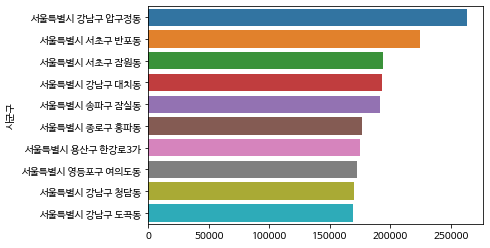

In [ ]:
# 서울시 아파트 평균 매매가 상위 10개 동 
sns.barplot(data=seoul, y=seoul_top10.index, x=seoul_top10.values)
plt.show()

In [ ]:
# 서울시 동별 아파트 가격 최소값 (오름차순 정렬)
seoul.groupby('시군구')['가격'].min().sort_values()

시군구
서울특별시 중구 신당동         8500
서울특별시 노원구 공릉동        8500
서울특별시 중구 장충동2가       8835
서울특별시 금천구 시흥동        9000
서울특별시 강동구 길동         9000
                    ...  
서울특별시 송파구 잠실동      145000
서울특별시 종로구 평동       152500
서울특별시 종로구 홍파동      159000
서울특별시 강남구 압구정동     170000
서울특별시 용산구 한강로3가    175000
Name: 가격, Length: 249, dtype: int64

In [ ]:
# 서울시 동별 아파트 가격 최대값 (내림차순 정렬)
seoul.groupby('시군구')['가격'].max().sort_values(ascending=False)

시군구
서울특별시 용산구 한남동        485000
서울특별시 강남구 도곡동        461000
서울특별시 서초구 반포동        415000
서울특별시 강남구 대치동        373000
서울특별시 강남구 압구정동       355000
                      ...  
서울특별시 서대문구 창천동        21900
서울특별시 영등포구 당산동6가      17400
서울특별시 영등포구 영등포동1가     13200
서울특별시 영등포구 영등포동3가     12000
서울특별시 중구 장충동2가         8835
Name: 가격, Length: 249, dtype: int64

In [ ]:
seoul['가격'].describe()

count      4701.000000
mean      69302.919166
std       42599.162101
min        8500.000000
25%       41500.000000
50%       60000.000000
75%       84500.000000
max      485000.000000
Name: 가격, dtype: float64

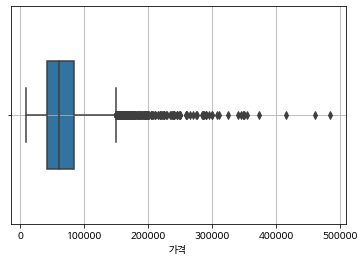

In [ ]:
# 서울시 아파트 가격 box plot
sns.boxplot(data=seoul, x='가격', width=0.5)
plt.grid()
plt.show()

# 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [ ]:
# 도/광역시별 아파트 가격 개수 (내림차순 정렬)
df.groupby('province')['가격'].count().sort_values(ascending=False)

province
경기도        12126
서울특별시       4701
경상남도        2955
인천광역시       2761
부산광역시       2752
대전광역시       2487
충청남도        2045
경상북도        1985
대구광역시       1969
광주광역시       1588
충청북도        1576
울산광역시       1562
전라북도        1394
전라남도        1234
강원도         1143
세종특별자치시      315
제주특별자치도      165
Name: 가격, dtype: int64

In [ ]:
# 도/광역시별 아파트 매매가 평균 (내림차순 정렬)
province_mean = df.groupby('province')['가격'].mean().sort_values(ascending=False)
province_mean

province
서울특별시      69302.919166
경기도        36447.593765
세종특별자치시    33577.206349
인천광역시      30196.960884
부산광역시      29593.587209
대구광역시      28031.251397
대전광역시      27591.418979
울산광역시      26581.768246
제주특별자치도    25878.181818
광주광역시      21786.904282
경상남도       20157.054484
충청북도       18068.494289
충청남도       17494.407824
경상북도       15304.175819
전라북도       14655.274032
전라남도       14523.552674
강원도        14305.559930
Name: 가격, dtype: float64

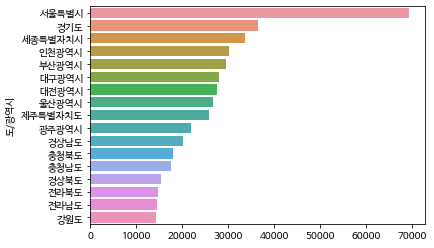

In [ ]:
# 도/광역시별 아파트 매매가 평균 차트
sns.barplot(data=df, y=province_mean.index, x=province_mean.values)
plt.ylabel('도/광역시')
plt.show()

In [ ]:
# 도/광역시별 아파트 가격 최소값 (오름차순 정렬)
df.groupby('province')['가격'].min()

province
강원도         950
경기도        2700
경상남도       2700
경상북도        600
광주광역시      4150
대구광역시      1500
대전광역시      2400
부산광역시      1500
서울특별시      8500
세종특별자치시    2880
울산광역시      4000
인천광역시      4000
전라남도       1330
전라북도        900
제주특별자치도    6000
충청남도       1500
충청북도       1100
Name: 가격, dtype: int64

In [ ]:
# 도/광역시별 아파트 가격 최대값 (내림차순 정렬)
df.groupby('province')['가격'].max().sort_values(ascending=False)

province
서울특별시      485000
부산광역시      376640
인천광역시      300000
경기도        262000
대구광역시      173500
대전광역시      150000
광주광역시      115000
충청북도        96000
충청남도        90000
경상남도        83200
세종특별자치시     82200
울산광역시       81000
제주특별자치도     76500
전라북도        68700
전라남도        61800
경상북도        50000
강원도         45800
Name: 가격, dtype: int64

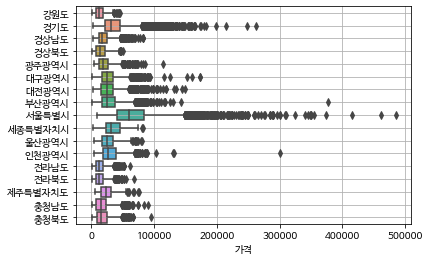

In [ ]:
# 도/광역시별 아파트 매매가 box plot
sns.boxplot(data=df, y=province, x='가격')
plt.grid()
plt.show()

# 면적이  $84m^2$  이상  $100m^2$ 미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [ ]:
seoul_over84 = seoul[(seoul['면적'] >= 84) & (seoul['면적'] < 100)]
seoul_over84

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,year,month
27027,서울특별시 강남구 논현동,80-13,80,13,프라임,97.8000,201910,1,93000,4,2004,도산대로30길 56,서울특별시,2019,10
27030,서울특별시 강남구 대치동,1014-3,1014,3,대치삼성,84.5800,201910,17,190000,3,2000,도곡로78길 22,서울특별시,2019,10
27033,서울특별시 강남구 대치동,988-4,988,4,대치효성,84.9100,201910,6,159000,5,1999,삼성로64길 12,서울특별시,2019,10
27037,서울특별시 강남구 대치동,1027,1027,0,래미안대치팰리스,84.9700,201910,14,277000,35,2015,삼성로51길 37,서울특별시,2019,10
27038,서울특별시 강남구 대치동,1027,1027,0,래미안대치팰리스,91.9300,201910,20,275000,23,2015,삼성로51길 35,서울특별시,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31691,서울특별시 중랑구 신내동,801,801,0,영풍마드레빌,84.8485,201910,12,55500,6,2004,용마산로129가길 41,서울특별시,2019,10
31692,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,7,41000,1,1996,봉화산로56길 123,서울특별시,2019,10
31693,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,7,43000,5,1996,봉화산로56길 145-1,서울특별시,2019,10
31694,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,11,44300,9,1996,봉화산로56길 123,서울특별시,2019,10


In [ ]:
# seoul_over84 중 동별 아파트 가격 개수 
seoul_over84['시군구'].value_counts()

서울특별시 구로구 구로동      35
서울특별시 관악구 봉천동      31
서울특별시 동작구 상도동      29
서울특별시 양천구 목동       26
서울특별시 노원구 중계동      24
                   ..
서울특별시 동작구 동작동       1
서울특별시 용산구 원효로1가     1
서울특별시 성동구 응봉동       1
서울특별시 용산구 한남동       1
서울특별시 강남구 논현동       1
Name: 시군구, Length: 193, dtype: int64

In [ ]:
# seoul_over84 동별 아파트 가격 평균 
seoul_over84.groupby('시군구')['가격'].mean().sort_values(ascending=False)

시군구
서울특별시 서초구 반포동     244833.333333
서울특별시 강남구 대치동     207000.000000
서울특별시 서초구 잠원동     195275.000000
서울특별시 강남구 삼성동     188500.000000
서울특별시 용산구 서빙고동    183000.000000
                      ...      
서울특별시 구로구 궁동       43000.000000
서울특별시 도봉구 도봉동      41895.454545
서울특별시 은평구 구산동      40200.000000
서울특별시 도봉구 방학동      39014.285714
서울특별시 도봉구 쌍문동      38142.857143
Name: 가격, Length: 193, dtype: float64

In [ ]:
seoul_over84_top10 = seoul_over84.groupby('시군구')['가격'].mean().sort_values(ascending=False).head(10)
seoul_over84_top10

시군구
서울특별시 서초구 반포동      244833.333333
서울특별시 강남구 대치동      207000.000000
서울특별시 서초구 잠원동      195275.000000
서울특별시 강남구 삼성동      188500.000000
서울특별시 용산구 서빙고동     183000.000000
서울특별시 송파구 잠실동      181500.000000
서울특별시 송파구 신천동      160333.333333
서울특별시 종로구 홍파동      159000.000000
서울특별시 강남구 청담동      157750.000000
서울특별시 영등포구 여의도동    155000.000000
Name: 가격, dtype: float64

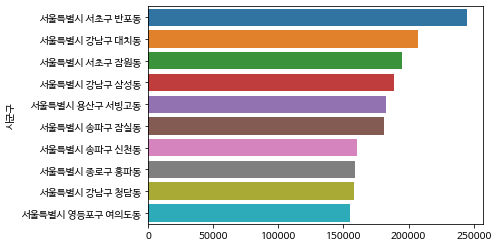

In [ ]:
# seoul_over84 아파트 평균 매매가 상위 10개 동 
sns.barplot(data=seoul, y=seoul_over84_top10.index, x=seoul_over84_top10.values)
plt.show()

In [ ]:
# seoul_over84 동별 아파트 가격 최소값 (오름차순 정렬)
seoul_over84.groupby('시군구')['가격'].min().sort_values()

시군구
서울특별시 양천구 신월동       27500
서울특별시 노원구 상계동       28000
서울특별시 서대문구 홍은동      28500
서울특별시 은평구 역촌동       29500
서울특별시 도봉구 쌍문동       30000
                    ...  
서울특별시 영등포구 여의도동    155000
서울특별시 송파구 신천동      155000
서울특별시 종로구 홍파동      159000
서울특별시 송파구 잠실동      167000
서울특별시 용산구 서빙고동     183000
Name: 가격, Length: 193, dtype: int64

In [ ]:
# seoul_over84 동별 아파트 가격 최대값 (내림차순 정렬)
seoul_over84.groupby('시군구')['가격'].max().sort_values(ascending=False)

시군구
서울특별시 서초구 반포동    340000
서울특별시 서초구 잠원동    285000
서울특별시 강남구 대치동    277000
서울특별시 강남구 삼성동    259000
서울특별시 송파구 잠실동    195000
                  ...  
서울특별시 도봉구 방학동     48000
서울특별시 강북구 우이동     45200
서울특별시 구로구 항동      44000
서울특별시 은평구 구산동     43300
서울특별시 구로구 궁동      43000
Name: 가격, Length: 193, dtype: int64

# 면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [ ]:
over84 = df[(df['면적'] >= 84) & (df['면적'] < 100)]
over84

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,year,month
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,5,25000,6,2005,경강로2539번길 22,강원도,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,12,20600,3,2005,경강로2539번길 22,강원도,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,20,20500,1,2005,경강로2539번길 22,강원도,2019,10
5,강원도 강릉시 교동,1984,1984,0,강릉 교동 풍림아이원 아파트,84.9964,201910,5,29200,14,2017,화부산로40번길 29,강원도,2019,10
9,강원도 강릉시 교동,1750,1750,0,교동1주공,84.8400,201910,18,21550,9,1999,가작로 78,강원도,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42752,충청북도 충주시 호암동,547-6,547,6,호반현대,84.9600,201910,26,9050,1,1994,신촌2길 29,충청북도,2019,10
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,5,12000,15,2002,원호암5길 32,충청북도,2019,10
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,15,11000,7,2002,원호암5길 32,충청북도,2019,10
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,17,12000,14,2002,원호암5길 32,충청북도,2019,10


In [ ]:
# over84 아파트들 중 도/광역시별 가격 개수
over84.groupby('province')['가격'].count().sort_values(ascending=False)

province
경기도        4659
서울특별시      1511
경상남도       1171
대전광역시      1066
인천광역시       922
부산광역시       886
대구광역시       758
경상북도        731
충청남도        725
울산광역시       657
광주광역시       612
전라북도        508
충청북도        499
전라남도        394
강원도         393
세종특별자치시     156
제주특별자치도      56
Name: 가격, dtype: int64

In [ ]:
# over84 아파트 도/광역시별 가격 평균 (내림차순 정렬)
over84_province_mean = df.groupby('province')['가격'].mean().sort_values(ascending=False)
over84_province_mean

province
서울특별시      69302.919166
경기도        36447.593765
세종특별자치시    33577.206349
인천광역시      30196.960884
부산광역시      29593.587209
대구광역시      28031.251397
대전광역시      27591.418979
울산광역시      26581.768246
제주특별자치도    25878.181818
광주광역시      21786.904282
경상남도       20157.054484
충청북도       18068.494289
충청남도       17494.407824
경상북도       15304.175819
전라북도       14655.274032
전라남도       14523.552674
강원도        14305.559930
Name: 가격, dtype: float64

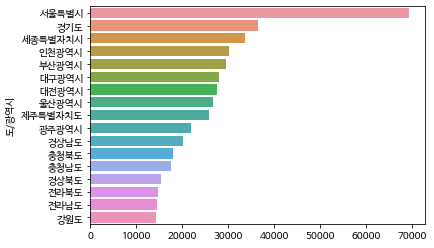

In [ ]:
# over84 아파트 도/광역시별 가격 평균 차트
sns.barplot(data=over84, y=over84_province_mean.index, x=over84_province_mean.values)
plt.ylabel('도/광역시')
plt.show()

In [ ]:
# over84 아파트 도/광역시별 가격 최소값 (오름차순 정렬)
over84.groupby('province')['가격'].min()

province
강원도         5200
경기도         7000
경상남도        5800
경상북도        4500
광주광역시      11500
대구광역시      11800
대전광역시       7500
부산광역시       9800
서울특별시      27500
세종특별자치시    10000
울산광역시       9000
인천광역시      10100
전라남도        2950
전라북도        5000
제주특별자치도    15800
충청남도        7400
충청북도        7800
Name: 가격, dtype: int64

In [ ]:
# over84 아파트 도/광역시별 가격 최대값 (내림차순 정렬)
over84.groupby('province')['가격'].max().sort_values(ascending=False)

province
서울특별시      340000
경기도        165000
대구광역시       91000
대전광역시       89500
인천광역시       85500
부산광역시       85000
제주특별자치도     75000
세종특별자치시     74000
광주광역시       70500
경상남도        69400
충청남도        67200
울산광역시       65000
경상북도        47250
강원도         45800
충청북도        43000
전라남도        40400
전라북도        37300
Name: 가격, dtype: int64